<a href="https://colab.research.google.com/github/Saira603K/QuantumComputing/blob/main/pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane --upgrade

In [4]:
import pennylane as qml
from pennylane import numpy as np

# Define a two-qubit system and a simple Hamiltonian
num_qubits = 2
H = qml.Hamiltonian([1, 1], [qml.PauliZ(0), qml.PauliX(1)])

# Initialize random parameters
params = np.random.rand(2)

dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(H)

def cost(params):
    return circuit(params)

# Initialize an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
steps = 100

# Optimization loop
for i in range(steps):
    params = opt.step(cost, params)
    print(f"Cost at step {i} is {cost(params):.4f}")

print(f"Optimized rotation angles: {params}")


Cost at step 0 is 1.4388
Cost at step 1 is 1.0028
Cost at step 2 is 0.3571
Cost at step 3 is -0.4237
Cost at step 4 is -1.1356
Cost at step 5 is -1.6065
Cost at step 6 is -1.8421
Cost at step 7 is -1.9406
Cost at step 8 is -1.9783
Cost at step 9 is -1.9921
Cost at step 10 is -1.9972
Cost at step 11 is -1.9990
Cost at step 12 is -1.9996
Cost at step 13 is -1.9999
Cost at step 14 is -2.0000
Cost at step 15 is -2.0000
Cost at step 16 is -2.0000
Cost at step 17 is -2.0000
Cost at step 18 is -2.0000
Cost at step 19 is -2.0000
Cost at step 20 is -2.0000
Cost at step 21 is -2.0000
Cost at step 22 is -2.0000
Cost at step 23 is -2.0000
Cost at step 24 is -2.0000
Cost at step 25 is -2.0000
Cost at step 26 is -2.0000
Cost at step 27 is -2.0000
Cost at step 28 is -2.0000
Cost at step 29 is -2.0000
Cost at step 30 is -2.0000
Cost at step 31 is -2.0000
Cost at step 32 is -2.0000
Cost at step 33 is -2.0000
Cost at step 34 is -2.0000
Cost at step 35 is -2.0000
Cost at step 36 is -2.0000
Cost at step 3

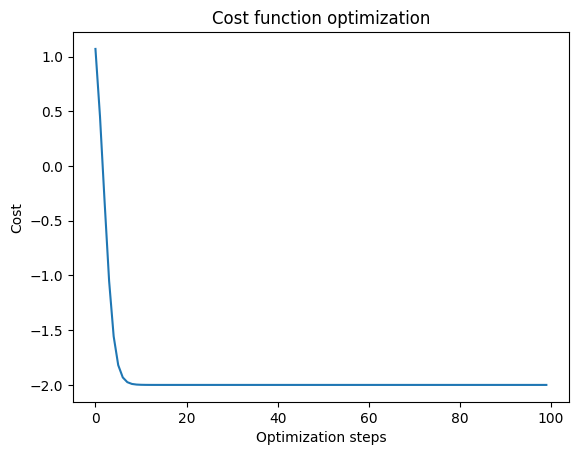

In [5]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define a two-qubit system and a simple Hamiltonian
num_qubits = 2
H = qml.Hamiltonian([1, 1], [qml.PauliZ(0), qml.PauliX(1)])

# Initialize random parameters
params = np.random.rand(2)

dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(H)

def cost(params):
    return circuit(params)

# Initialize an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
steps = 100

# Create a list to store cost values
costs = []

# Optimization loop
for i in range(steps):
    params = opt.step(cost, params)
    costs.append(cost(params))

# Plot the cost function
plt.plot(costs)
plt.title('Cost function optimization')
plt.xlabel('Optimization steps')
plt.ylabel('Cost')
plt.show()


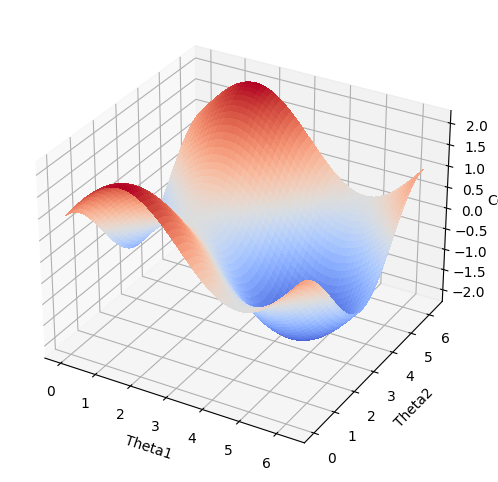

In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Define a two-qubit system and a simple Hamiltonian
num_qubits = 2
H = qml.Hamiltonian([1, 1], [qml.PauliZ(0), qml.PauliX(1)])

dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(H)

def cost(params):
    return circuit(params)

# Initialize an optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# Number of optimization steps
steps = 100

# Optimization loop
for i in range(steps):
    params = opt.step(cost, params)

# Create a grid of parameter values
num_points = 50
params_grid = np.linspace(0, 2 * np.pi, num_points)
params_vals = np.array([[theta1, theta2] for theta1 in params_grid for theta2 in params_grid])

# Evaluate the cost function at each point in the grid
cost_vals = np.array([cost(params) for params in params_vals])

# Reshape the cost values to a 2D array
cost_vals = cost_vals.reshape((num_points, num_points))

# Plot the cost function
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(params_grid, params_grid)
surf = ax.plot_surface(X, Y, cost_vals, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('Cost')

# Mark the minimum
min_params_idx = np.unravel_index(np.argmin(cost_vals), cost_vals.shape)
ax.scatter(params_grid[min_params_idx[0]], params_grid[min_params_idx[1]], np.min(cost_vals), color='r')

plt.show()
